<a href="https://colab.research.google.com/github/Jamaleldin/MRNET-for-Knee-Diagnosis/blob/Model_inception/inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Needed Imports for the Inception Module

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
import numpy as np

# Functions to create Inception Blocks

## There is five different kinds of blocks

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block1(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=64,64,64

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=48,48,48
  branch2 = Conv2D(f2_out, (5,5), padding='same', activation='relu')(branch2) #depth=64,64,64

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=64,64,64
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=96,96,96
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=96,96,96
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=32,64,64
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block2(layer_in, f1, f2_in, f2_out, name):
  branch1 = Conv2D(f1, (3,3), padding='valid', strides=(2, 2), activation='relu')(layer_in) #depth=384

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=64
  branch2 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(branch2) #depth=96
  branch2 = Conv2D(f2_out, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch2) #depth=96
 	# max pooling used to provide more options to the inception layer
  branch3 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(layer_in)
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block3(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=192,192,192,192

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=128,160,160,192
  branch2 = Conv2D(f2_in, (1,7), padding='same', activation='relu')(branch2) #depth=128,160,160,192
  branch2 = Conv2D(f2_out, (7,1), padding='same', activation='relu')(branch2) #depth=192,192,192,192

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (7,1), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (1,7), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (7,1), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_out, (1,7), padding='same', activation='relu')(branch3) #depth=192,192,192,192
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=192,192,192,192
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block4(layer_in, f1_in, f1_out, f2, name):
  branch1 = Conv2D(f1_in, (1,1), padding='same', activation='relu')(layer_in) #depth=192
  branch1 = Conv2D(f1_out, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch1) #depth=320

  branch2 = Conv2D(f2, (1,1), padding='same', activation='relu')(layer_in) #depth=192
  branch2 = Conv2D(f2, (1,7), padding='same', activation='relu')(branch2) #depth=192
  branch2 = Conv2D(f2, (7,1), padding='same', activation='relu')(branch2) #depth=192
  branch2 = Conv2D(f2, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch2) #depth=192
 	# max pooling used to provide more options to the inception layer
  branch3 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(layer_in)
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block5(layer_in, f1, f2, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=320

  branch2 = Conv2D(f2, (1,1), padding='same', activation='relu')(layer_in) #depth=384
  branch2 = concatenate([Conv2D(f2, (1,3), padding='same', activation='relu')(branch2),
	                       Conv2D(f2, (3,1), padding='same', activation='relu')(branch2)], axis=3)

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=448
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=384
  branch3 = concatenate([Conv2D(f3_out, (1,3), padding='same', activation='relu')(branch3),
	                       Conv2D(f3_out, (3,1), padding='same', activation='relu')(branch3)], axis=3)
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=192
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

# Creating the Module

In [0]:
def inception_v3():
  # the first layers in the inception module
  input_layer = Input(shape=(256, 256, 3))

  x = Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu', name='conv_1_3x3/2')(input_layer)

  x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2_3x3/1')(x)
  x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_3_3x3/1')(x)
  # Max pooling selects the maximum element from the region of the feature map covered by the filter. 
  # Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
  x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
  x = Conv2D(80, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_4_1x1/1')(x)

  x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_5_3x3/1')(x)
  x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)
  # starting to put the inception layers (11 blocks)
  x = inception_block1(x, 64, 48, 64, 64, 96, 32, 'blck1_1')
  x = inception_block1(x, 64, 48, 64, 64, 96, 64, 'block1_2')
  x = inception_block1(x, 64, 48, 64, 64, 96, 64, 'block1_3')

  x = inception_block2(x, 384, 64, 96, 'block2')

  x = inception_block3(x, 192, 128, 192, 128, 192, 192, 'block3_1')
  x = inception_block3(x, 192, 160, 192, 160, 192, 192, 'block3_2')
  x = inception_block3(x, 192, 160, 192, 160, 192, 192, 'block3_3')
  x = inception_block3(x, 192, 192, 192, 192, 192, 192, 'block3_4')
  # auxiliary logits branch to overcome the vanishing gradient problem
  x1 = AveragePooling2D((5, 5), padding='valid', strides=3)(x)
  x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
  x1 = Conv2D(768, (min(x1.shape[1],5), min(x1.shape[2],5)), padding='valid', activation='relu')(x1)
  # flatten takes the output of the previous layers, “flattens” them and turns them into a single vector that can be an input for the next stage.#
  x1 = Flatten()(x1)
  x1 = Dense(1024, activation='relu')(x1)
  x1 = Dense(1, activation='sigmoid', name='auxilliary_output_1')(x1)
  x = inception_block4(x, 192, 320, 192, name='block4')
  # last two inception layers
  x = inception_block5(x, 320, 384, 448, 384, 192, 'block5_1')
  x = inception_block5(x, 320, 384, 448, 384, 192, 'block5_2')
  x = AveragePooling2D((min(x.shape[1],7), min(x.shape[2],7)), padding='valid')(x)
  x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(1, activation='sigmoid', name='output_prediction')(x)
  # create model
  model2 = Model(inputs=input_layer, outputs=x)
  # summarize model
  model2.summary()
  # plot model architecture
  plot_model(model2, show_shapes=True, to_file='inception_module.png')
  model2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-5), metrics=['acc'])
  return model2

# Initializing drive and imports for training

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [9]:
%cd '/content/drive/My Drive/Colab Notebooks'
!pip install import-ipynb

/content/drive/My Drive/Colab Notebooks
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=79a24b2374469b6fb6a84676051bb6a51adb516dd04264d4d7c6622b8c0deb39
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [10]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


# Training Extractors

### Sagittal Abnormal

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
______________________________________________________________________________________________

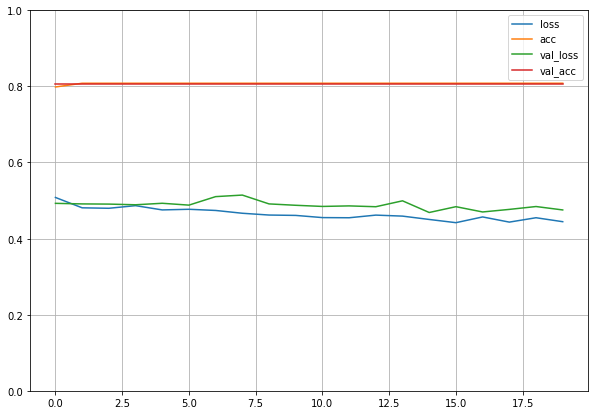

In [0]:
# Extractor Training for Sagittal Abnormal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.sagittal, processing.abnormal)

In [0]:
processing.test_extractor(inception_model, processing.sagittal, processing.abnormal)

4/4 [==============================] - 1s 148ms/step - loss: 0.4878 - acc: 0.7917


[0.48783427476882935, 0.7916666865348816]

### Sagittal ACL

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

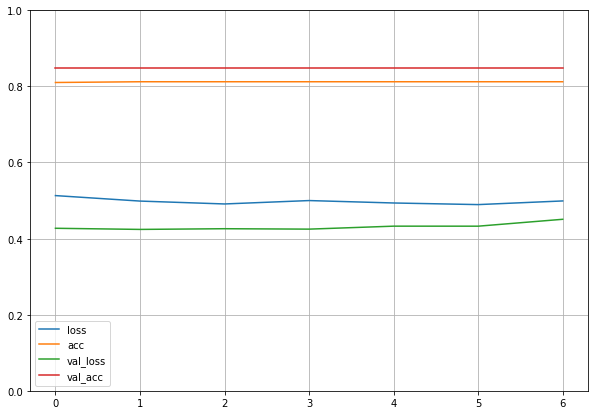

In [0]:
# Extractor Training for Sagittal ACL
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.sagittal, processing.acl)

In [0]:
processing.test_extractor(inception_model, processing.sagittal, processing.acl)

4/4 [==============================] - 0s 47ms/step - loss: 0.7829 - acc: 0.5500


[0.7829024195671082, 0.550000011920929]

### Sagittal Meniscal

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

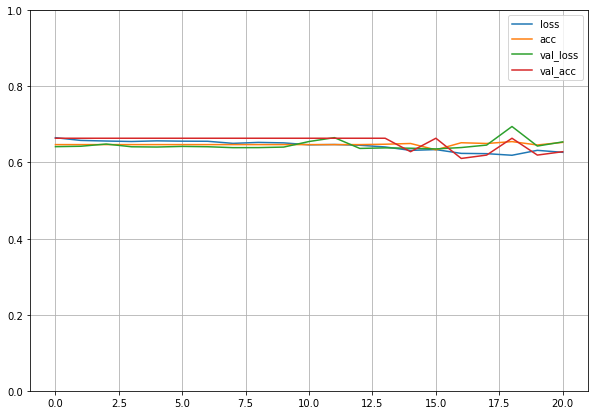

In [0]:
# Extractor Training for Sagittal Meniscal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.sagittal, processing.meniscal)

In [0]:
processing.test_extractor(inception_model, processing.sagittal, processing.meniscal)

4/4 [==============================] - 0s 48ms/step - loss: 0.6863 - acc: 0.5583


[0.6862527132034302, 0.5583333373069763]

### Axial Abnormal

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
______________________________________________________________________________________________

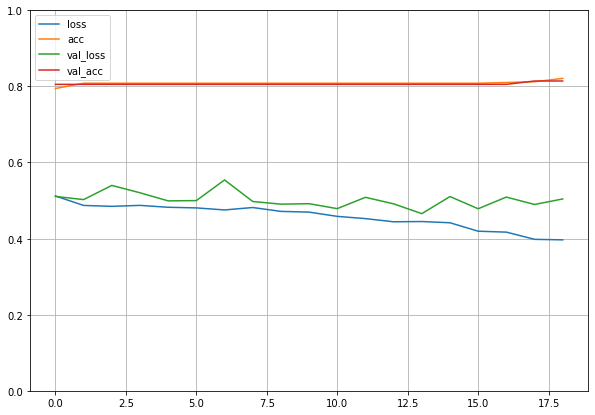

In [0]:
# Extractor Training for Axial Abnormal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.axial, processing.abnormal)

In [0]:
processing.test_extractor(inception_model, processing.axial, processing.abnormal)

4/4 [==============================] - 1s 146ms/step - loss: 0.5515 - acc: 0.8000


[0.5515199899673462, 0.800000011920929]

### Axial ACL

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

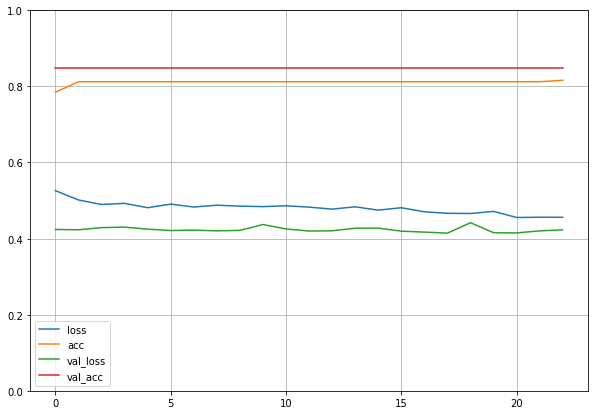

In [0]:
# Extractor Training for Axial ACL
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.axial, processing.acl)

In [0]:
processing.test_extractor(inception_model, processing.axial, processing.acl)

4/4 [==============================] - 0s 47ms/step - loss: 0.8412 - acc: 0.5500


[0.8412408232688904, 0.550000011920929]

### Axial Meniscal

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

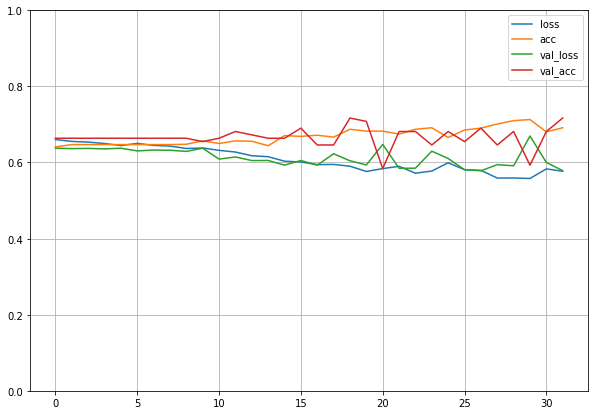

In [0]:
# Extractor Training for Axial Meniscal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.axial, processing.meniscal)

In [0]:
processing.test_extractor(inception_model, processing.axial, processing.meniscal)

4/4 [==============================] - 0s 50ms/step - loss: 0.5988 - acc: 0.6917


[0.5988274812698364, 0.6916666626930237]

### Coronal Abnormal

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

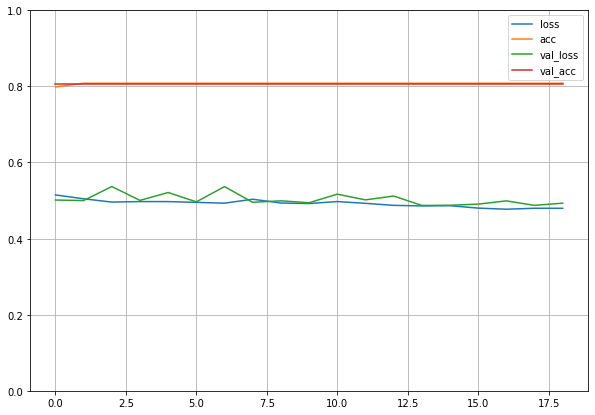

In [0]:
# Extractor Training for Coronal Abnormal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.coronal, processing.abnormal)

In [0]:
processing.test_extractor(inception_model, processing.coronal, processing.abnormal)

4/4 [==============================] - 0s 48ms/step - loss: 0.5035 - acc: 0.7917


[0.5034505128860474, 0.7916666865348816]

### Coronal ACL

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
______________________________________________________________________________________________

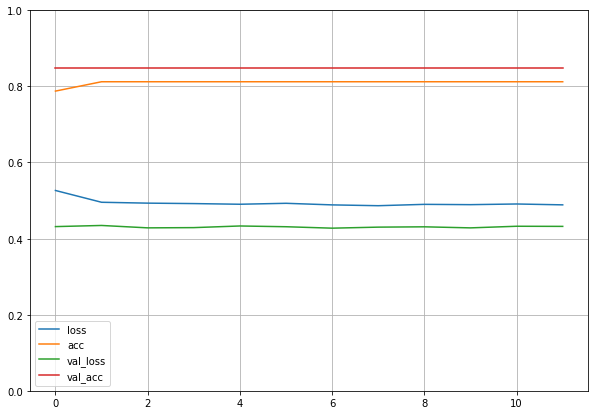

In [0]:
# Extractor Training for Coronal ACL
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.coronal, processing.acl)

In [0]:
processing.test_extractor(inception_model, processing.coronal, processing.acl)

4/4 [==============================] - 1s 146ms/step - loss: 0.8630 - acc: 0.5500


[0.8630425930023193, 0.550000011920929]

### Coronal Meniscal

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

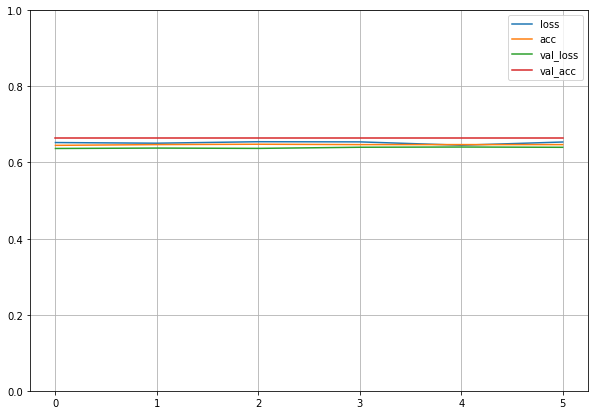

In [0]:
# Extractor Training for Coronal Meniscal
inception_model = inception_v3()
processing.train_extractor(inception_model, processing.inception, processing.coronal, processing.meniscal)

In [0]:
processing.test_extractor(inception_model, processing.coronal, processing.meniscal)

4/4 [==============================] - 0s 49ms/step - loss: 0.6921 - acc: 0.5667


[0.6920576691627502, 0.5666666626930237]

# Training Classifier

In [0]:
inception_model = None
# Function to create the binary classifier model for training
def classifier():
  classifier = tf.keras.Sequential()
  classifier.add(Dense(1024, activation='relu', input_dim=2048))
  classifier.add(Dense(1, activation='sigmoid'))
  classifier.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-5), metrics=['acc'])
  return classifier

### Sagittal Abnormal

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

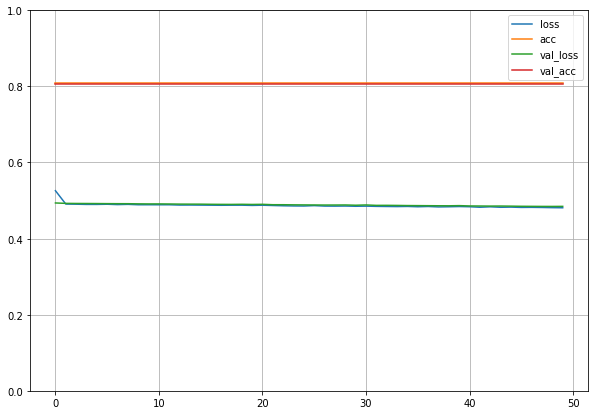

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.sagittal, processing.abnormal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.sagittal, processing.abnormal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.sagittal, processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5155 - acc: 0.7917


[0.5155370831489563, 0.7916666865348816]

### Sagittal ACL

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

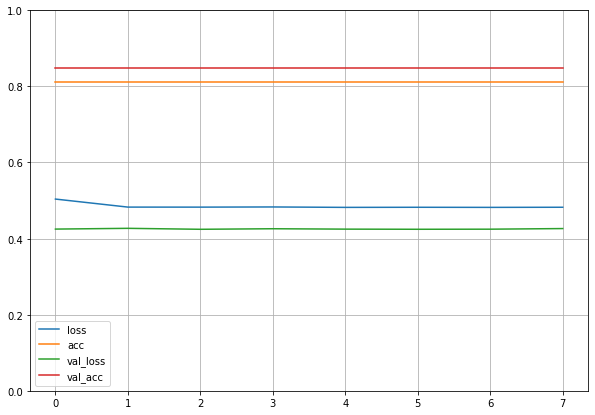

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.sagittal, processing.acl, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.sagittal, processing.acl)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.sagittal, processing.acl)

4/4 [==============================] - 0s 4ms/step - loss: 0.8557 - acc: 0.5500


[0.8556503057479858, 0.550000011920929]

### Sagittal Meniscal

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

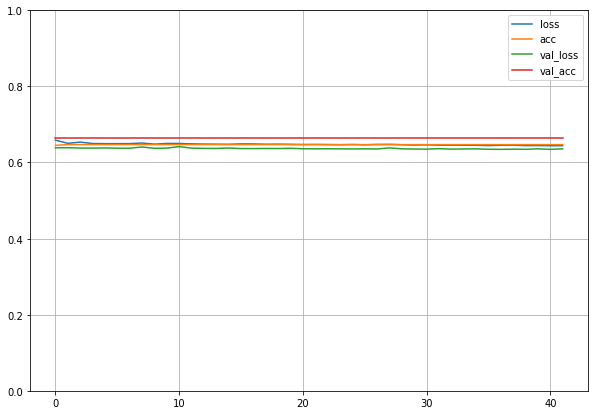

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.sagittal, processing.meniscal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.sagittal, processing.meniscal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.sagittal, processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6863 - acc: 0.5667


[0.6862724423408508, 0.5666666626930237]

### Axial Abnormal

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

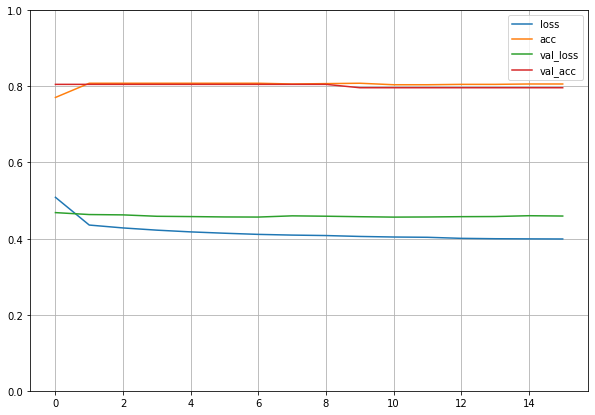

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.axial, processing.abnormal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.axial, processing.abnormal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.axial, processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5614 - acc: 0.7917


[0.5614127516746521, 0.7916666865348816]

### Axial ACL

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

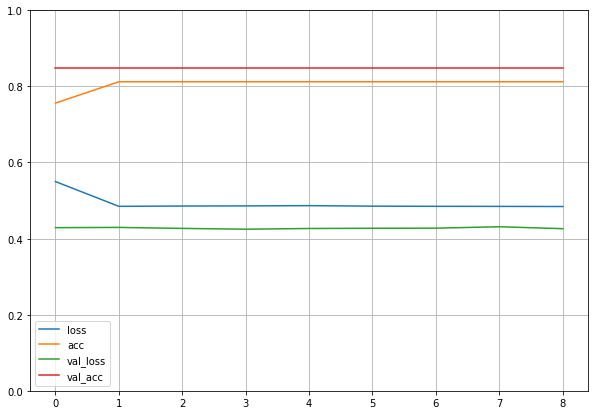

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.axial, processing.acl, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.axial, processing.acl)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.axial, processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.8827 - acc: 0.5500


[0.882702112197876, 0.550000011920929]

### Axial Meniscal

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

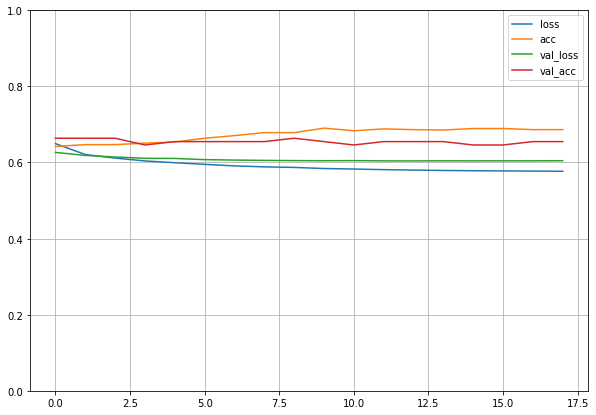

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.axial, processing.meniscal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.axial, processing.meniscal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.axial, processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6406 - acc: 0.6250


[0.6406363248825073, 0.625]

### Coronal Abnormal

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
______________________________________________________________________________________________

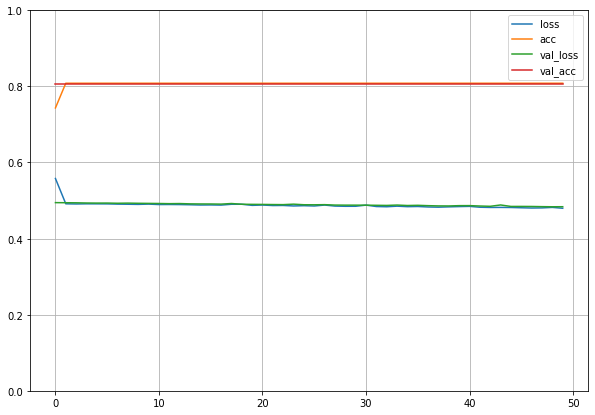

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.coronal, processing.abnormal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.coronal, processing.abnormal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.coronal, processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5091 - acc: 0.7917


[0.5091150999069214, 0.7916666865348816]

### Coronal ACL

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

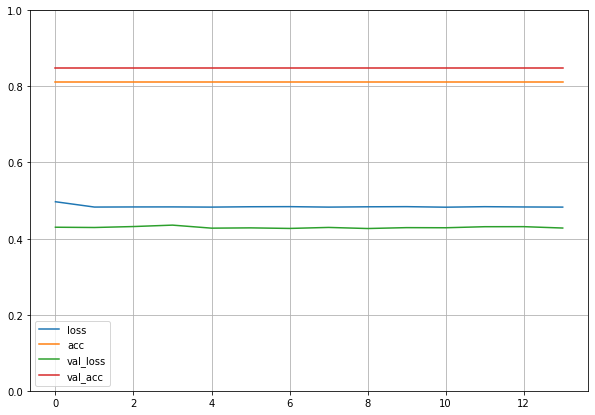

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.coronal, processing.acl, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.coronal, processing.acl)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.coronal, processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.8834 - acc: 0.5500


[0.8833557367324829, 0.550000011920929]

### Coronal Meniscal

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

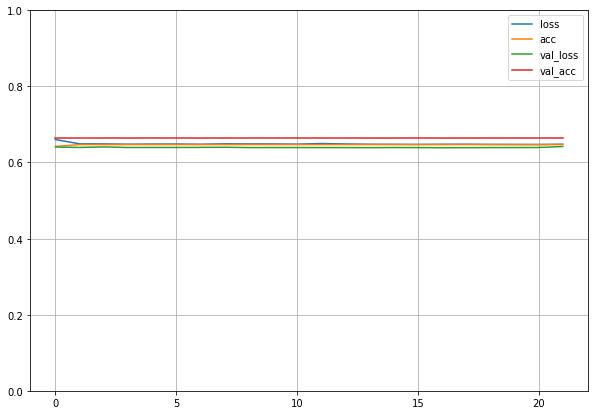

In [0]:
#loading model to train classifier
loaded_model = processing.load_model(processing.inception, processing.coronal, processing.meniscal, processing.extractor)
extractor_model = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('block5_2').output)
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.inception, processing.coronal, processing.meniscal)

In [0]:
processing.test_classifier(extractor_model, classifier_model, processing.coronal, processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6896 - acc: 0.5667


[0.6896110773086548, 0.5666666626930237]

# Training Regressor

In [0]:
def regressor():  
  log_reg = tf.keras.Sequential()
  log_reg.add(Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-2),metrics=['acc'])
  return log_reg

### Abnormal

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5144 - acc: 0.8105
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/Inception V3/Regressor/abnormal.h5
51/51 [==============================] - 1s 12ms/step - loss: 0.5146 - acc: 0.8083 - val_loss: 0.4974 - val_acc: 0.8053
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4964 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4966 - acc: 0.8083 - val_loss: 0.4970 - val_acc: 0.8053
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5047 - acc: 0.8031
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4969 - acc: 0.8083 - val_loss: 0.4968 - val_acc: 0.8053
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4975 - acc: 0.8073
Epoch 00004: val_acc did not improve from 0.80531
51

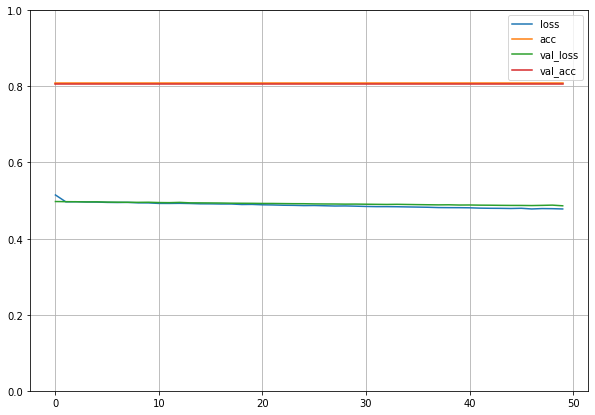

In [16]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.inception, processing.sagittal, processing.abnormal, processing.extractor)
sagittal_extractor = Model(inputs=loaded_model_saggital.input, outputs=loaded_model_saggital.get_layer('block5_2').output)
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.inception, processing.axial, processing.abnormal, processing.extractor)
axial_extractor = Model(inputs=loaded_model_axial.input, outputs=loaded_model_axial.get_layer('block5_2').output)
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.inception, processing.coronal, processing.abnormal, processing.extractor)
coronal_extractor = Model(inputs=loaded_model_coronal.input, outputs=loaded_model_coronal.get_layer('block5_2').output)
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.inception, processing.abnormal)

In [17]:
processing.test_regressor(axial_extractor,sagittal_extractor,coronal_extractor, processing.inception, processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5167 - acc: 0.7917


[0.5167397260665894, 0.7916666865348816]

### ACL

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 0.6301 - acc: 0.7120
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/Inception V3/Regressor/acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6281 - acc: 0.7148 - val_loss: 0.5288 - val_acc: 0.8496
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 0.5308 - acc: 0.8023
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5182 - acc: 0.8122 - val_loss: 0.4601 - val_acc: 0.8496
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.4908 - acc: 0.8120
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4905 - acc: 0.8122 - val_loss: 0.4384 - val_acc: 0.8496
Epoch 4/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4883 - acc: 0.8093
Epoch 00004: val_acc did not improve from 0.84956
51/51 [=

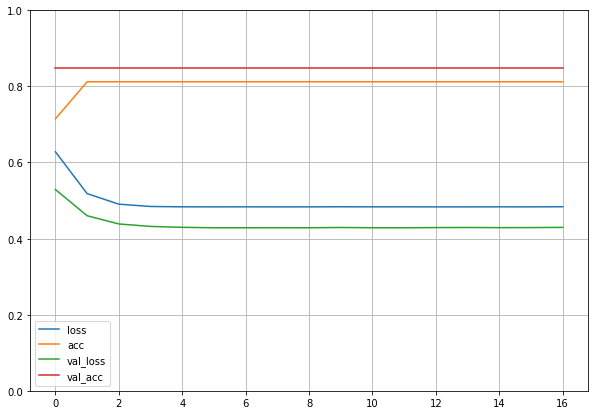

In [18]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.inception, processing.sagittal, processing.acl, processing.extractor)
sagittal_extractor = Model(inputs=loaded_model_saggital.input, outputs=loaded_model_saggital.get_layer('block5_2').output)
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.inception, processing.axial, processing.acl, processing.extractor)
axial_extractor = Model(inputs=loaded_model_axial.input, outputs=loaded_model_axial.get_layer('block5_2').output)
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.inception, processing.coronal, processing.acl, processing.extractor)
coronal_extractor = Model(inputs=loaded_model_coronal.input, outputs=loaded_model_coronal.get_layer('block5_2').output)
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.inception, processing.acl)

In [19]:
processing.test_regressor(axial_extractor,sagittal_extractor,coronal_extractor, processing.inception, processing.acl)

4/4 [==============================] - 0s 2ms/step - loss: 0.7071 - acc: 0.5500


[0.7071331739425659, 0.550000011920929]

### Meniscal

Epoch 1/50
35/51 [===================>..........] - ETA: 0s - loss: 0.6636 - acc: 0.6471
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/Inception V3/Regressor/meniscus.h5
51/51 [==============================] - 1s 29ms/step - loss: 0.6666 - acc: 0.6332 - val_loss: 0.6418 - val_acc: 0.6637
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6507 - acc: 0.6457
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6499 - acc: 0.6470 - val_loss: 0.6393 - val_acc: 0.6637
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6424 - acc: 0.6587
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6498 - acc: 0.6470 - val_loss: 0.6385 - val_acc: 0.6637
Epoch 4/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6511 - acc: 0.6459
Epoch 00004: val_acc did not improve from 0.66372
51

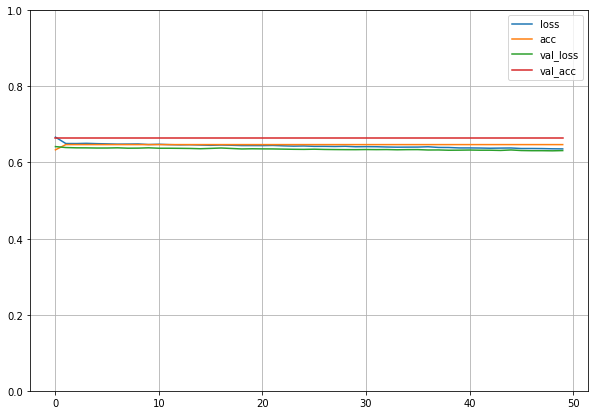

In [13]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.inception, processing.sagittal, processing.meniscal, processing.extractor)
sagittal_extractor = Model(inputs=loaded_model_saggital.input, outputs=loaded_model_saggital.get_layer('block5_2').output)
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.inception, processing.axial, processing.meniscal, processing.extractor)
axial_extractor = Model(inputs=loaded_model_axial.input, outputs=loaded_model_axial.get_layer('block5_2').output)
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.inception, processing.coronal, processing.meniscal, processing.extractor)
coronal_extractor = Model(inputs=loaded_model_coronal.input, outputs=loaded_model_coronal.get_layer('block5_2').output)
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.inception, processing.meniscal)

In [14]:
processing.test_regressor(axial_extractor,sagittal_extractor,coronal_extractor, processing.inception, processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6912 - acc: 0.5667


[0.6911898255348206, 0.5666666626930237]